# PCA 用于面部数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio

In [2]:
raw_data = sio.loadmat('data/ex7faces.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [3]:
faces = raw_data['X']
faces.shape

(5000, 1024)

In [4]:
def plot_n_images(x,n):
    pic_size = int(np.sqrt(x.shape[1]))
    grid_size = int(np.sqrt(n))
    
    first_n_iamges = x[:n,:]
    fig, ax_array = plt.subplots(nrows=grid_size, 
                                 ncols=grid_size,sharey=True, sharex=True, 
                                 figsize=(grid_size, grid_size))
    
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_iamges[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
      

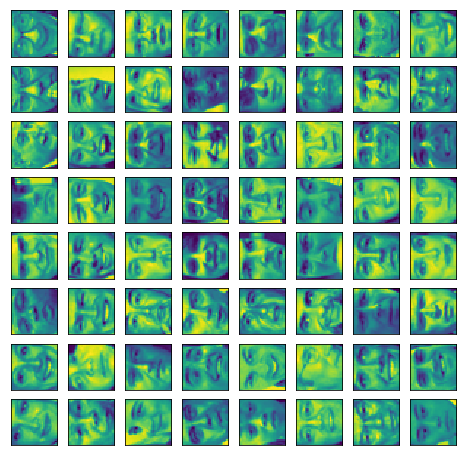

In [5]:
plot_n_images(faces,n=64)
plt.show()

In [6]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    cov = (X.T @ X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [7]:
def project_data(x,U,k):
    U_reduced = U[:,:k]
    return np.dot(x,U_reduced)

In [8]:
def recover_data(Z,U,k):
    U_reduced = U[:,:k]
    return np.dot(Z,U_reduced.T)

## 使用PCA找到主成分

In [9]:
U, S, V = pca(faces)
Z = project_data(faces, U, 100)
Z.shape

(5000, 100)

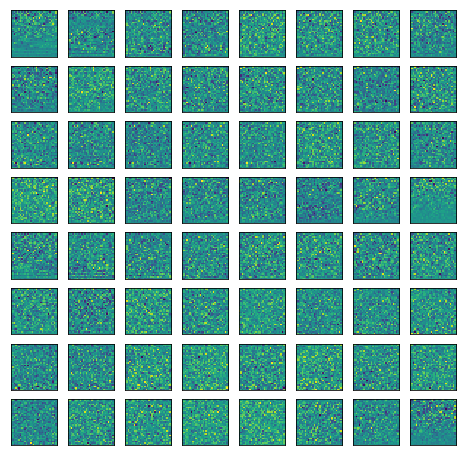

In [10]:
#并看不到脸
plot_n_images(U, n=64)
plt.show()

## 降维

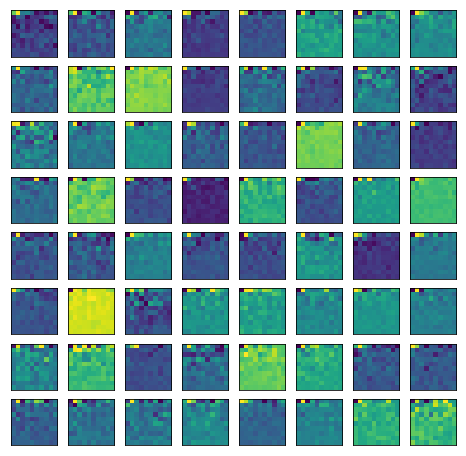

In [11]:
plot_n_images(Z, n=64)
plt.show()

## 恢复数据

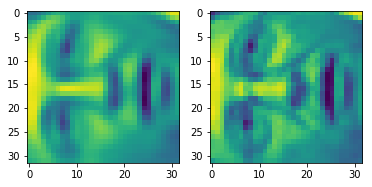

In [19]:
faces = raw_data['X']
X_recovered = recover_data(Z, U, 100)
reduce_face = np.reshape(X_recovered[3,:], (32, 32))
original_face = np.reshape(faces[3,:],(32,32))
fig,ax = plt.subplots(1,2)
ax[0].imshow(reduce_face)
ax[1].imshow(original_face)
plt.show()

可以看到维度减少了10倍，只能大概看清轮廓，看不清脸，虽然原图也不清楚